Loading Data

### Submitted by : - Radium Gautam (ACE080BCT051)
###                 Sanjiban Das (ACE080BCT068)
###                 Saurav joshi (ACE080BCT071)

In [8]:
import pandas as pd
import numpy as np

# read in all our data
accident= pd.read_csv("road accidents.csv")

# set seed for reproducibility
np.random.seed(0)

In [2]:
accident.head(10)

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
5,200901BS70006,1/1/2021,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.493415,Daylight,...,3,2,Metropolitan Police,Dry,Single carriageway,30,11:48,Urban,Fine no high winds,Car
6,200901BS70007,1/8/2021,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.480177,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,13:58,Urban,Fine no high winds,Motorcycle over 500cc
7,200901BS70008,1/2/2021,Jan,Friday,2021,Auto traffic signal,Crossroads,Slight,51.491957,Daylight,...,1,1,Metropolitan Police,Dry,Dual carriageway,30,13:18,Urban,Fine no high winds,Car
8,200901BS70009,1/7/2021,Jan,Wednesday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.496460,Daylight,...,2,1,Metropolitan Police,Dry,Single carriageway,30,12:15,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under
9,200901BS70010,1/10/2021,Jan,Saturday,2021,Auto traffic signal,Crossroads,Slight,51.481150,Daylight,...,1,1,Metropolitan Police,Wet or damp,Single carriageway,30,9:52,Urban,Other,Car


Checking the missing data

In [ ]:
# get the number of missing data points per column
missing_values_count = accident.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:]

Accident_Index                     0
Accident Date                      0
Month                              0
Day_of_Week                        0
Year                               0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

## Feature scaling

In [6]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'road accidents.csv'
road_accidents = pd.read_csv(file_path)

# Extract the hour from the 'Time' column
if 'Time' in road_accidents.columns:
    road_accidents['Hour'] = pd.to_datetime(road_accidents['Time'], errors='coerce').dt.hour
    road_accidents['Hour'] = road_accidents['Hour'].fillna(-1).astype(int)  # Replace NaN with -1 for invalid times
else:
    raise ValueError("The dataset does not contain a 'Time' column.")

# Min-Max Scaling for numerical columns
numerical_cols = road_accidents.select_dtypes(include=['float64', 'int64']).columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
road_accidents[numerical_cols] = scaler.fit_transform(road_accidents[numerical_cols])

# Group accidents by the hour and count the occurrences
hourly_accidents = road_accidents.groupby('Hour').size()

# Find the peak hour (hour with the most accidents) and the least hour
peak_hour = hourly_accidents.idxmax()
peak_count = hourly_accidents.max()
least_hour = hourly_accidents.idxmin()
least_count = hourly_accidents.min()

# Display the results
print(f"Peak Hour: {peak_hour}, Number of Accidents: {peak_count}")
print(f"Least Hour: {least_hour}, Number of Accidents: {least_count}")


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22096\1498879528.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  road_accidents['Hour'] = pd.to_datetime(road_accidents['Time'], errors='coerce').dt.hour


Peak Hour: 0.7499999999999999, Number of Accidents: 26964
Least Hour: 0.0, Number of Accidents: 17


Visualization


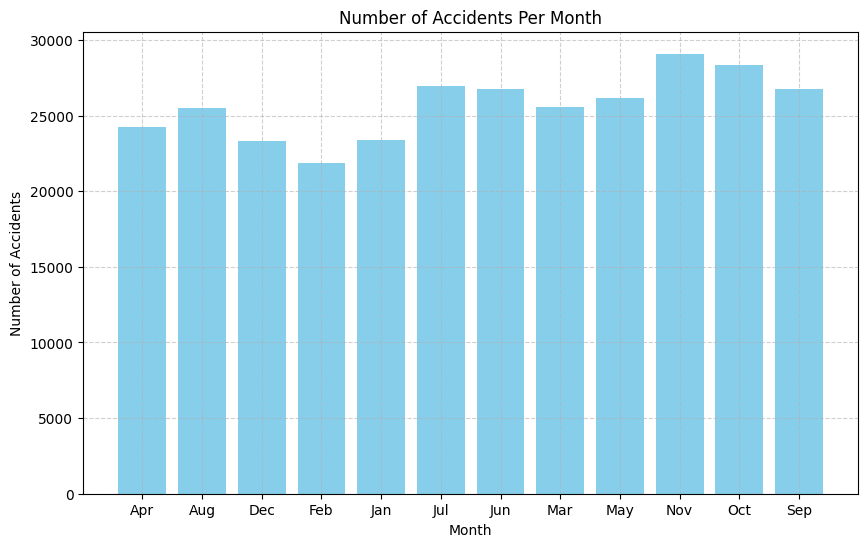

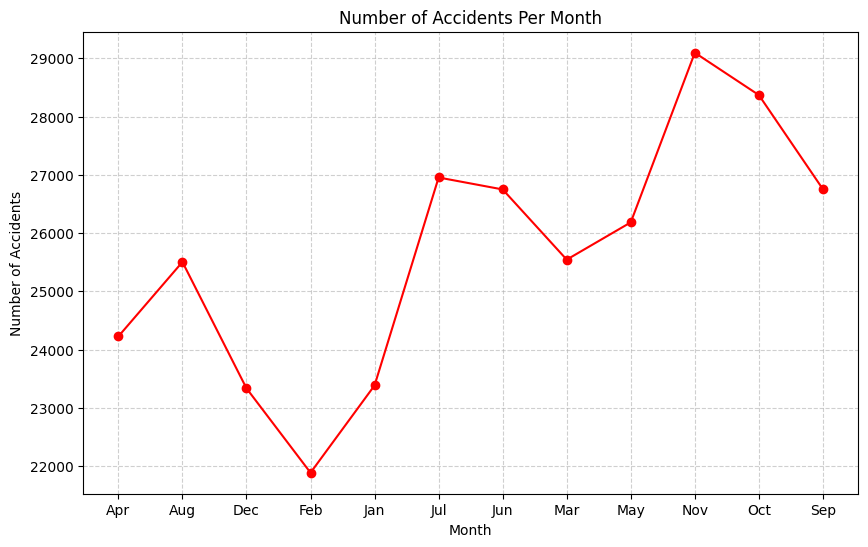

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping the dataset by Month and counting the number of accidents
accidents_per_month = accident['Month'].value_counts().sort_index()

# Bar Graph
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_month.index, accidents_per_month.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Per Month')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Line Graph
plt.figure(figsize=(10, 6))
plt.plot(accidents_per_month.index, accidents_per_month.values, marker='o', linestyle='-', color='red')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Per Month')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


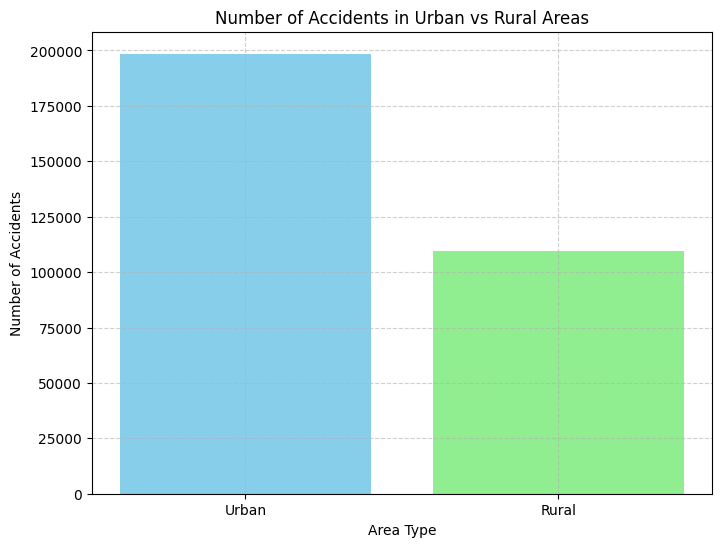

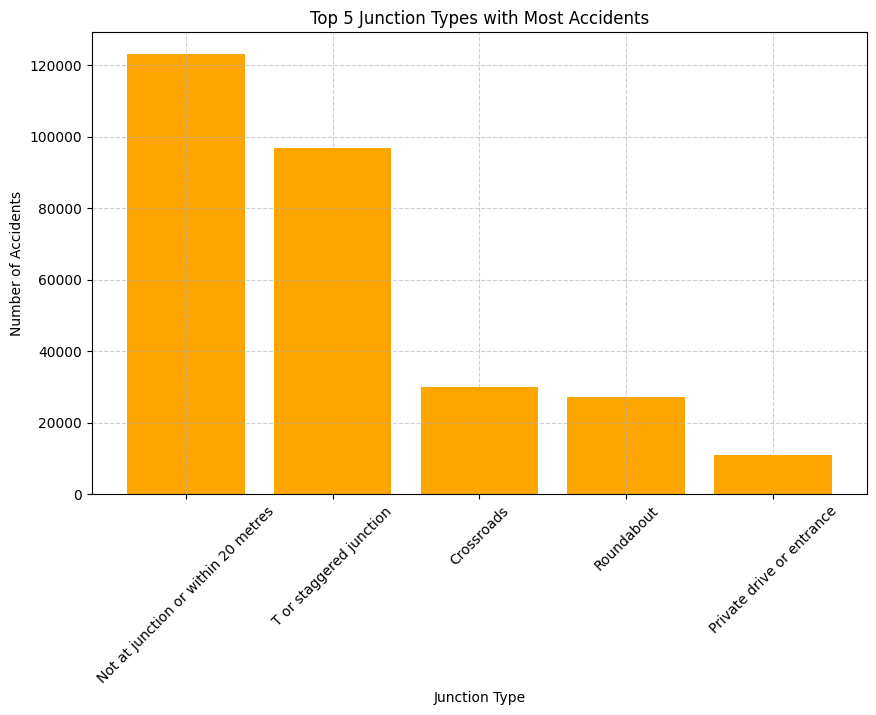

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Urban vs Rural Accidents
urban_rural = accident['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(urban_rural.index, urban_rural.values, color=['skyblue', 'lightgreen'])
plt.title('Number of Accidents in Urban vs Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Accidents by Junction Type
junction = accident['Junction_Detail'].value_counts().head(5)  # Top 5 Junction Types

plt.figure(figsize=(10, 6))
plt.bar(junction.index, junction.values, color='orange')
plt.title('Top 5 Junction Types with Most Accidents')
plt.xlabel('Junction Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


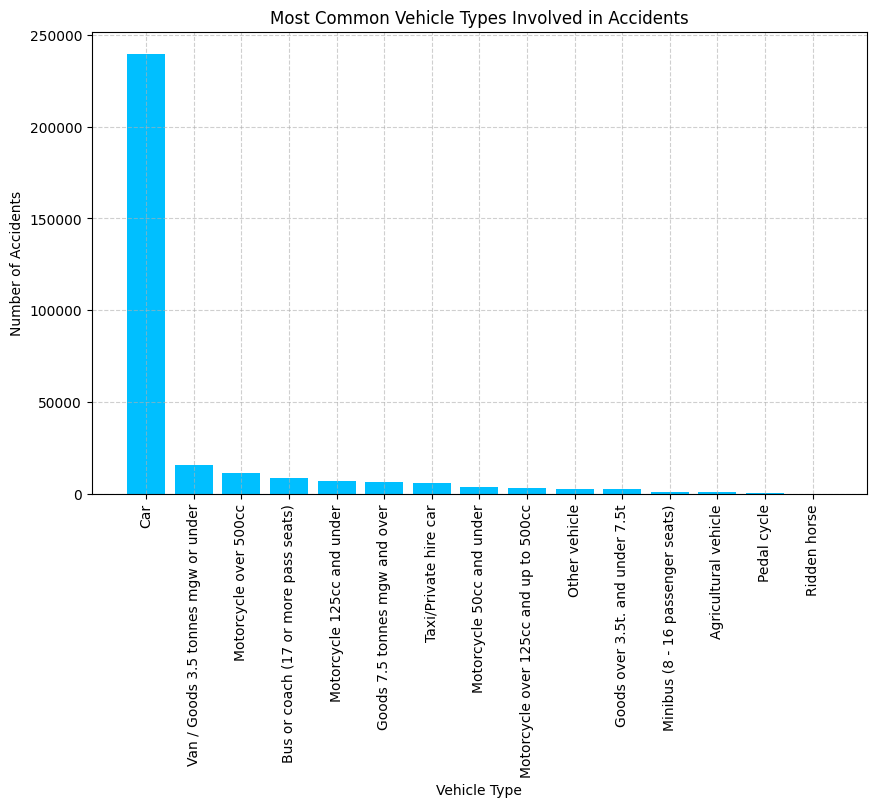

In [9]:
import matplotlib.pyplot as plt

# Assuming 'Vehicle_Type' column holds the type of vehicle involved
vehicle_counts = accident['Vehicle_Type'].value_counts()

# Plot Most Common Vehicle Types Involved in Accidents
plt.figure(figsize=(10, 6))
plt.bar(vehicle_counts.index, vehicle_counts.values, color='deepskyblue')
plt.title('Most Common Vehicle Types Involved in Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


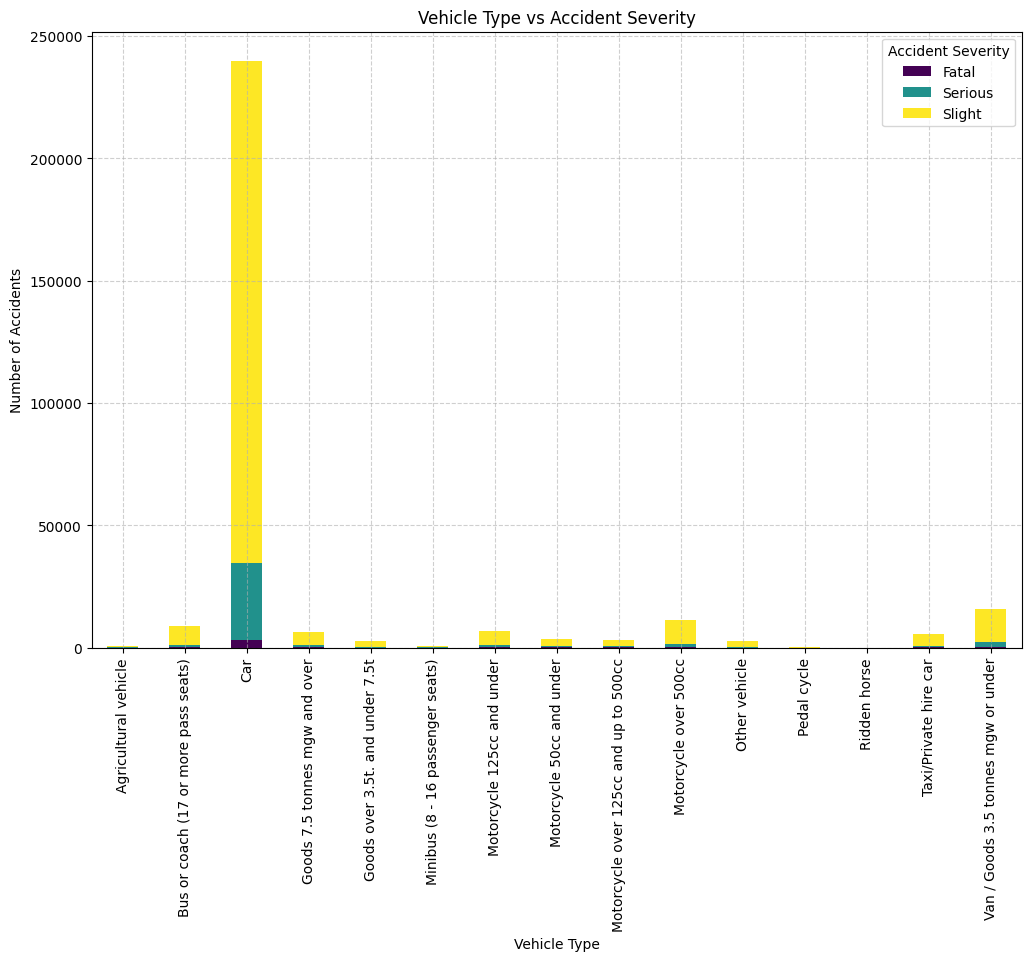

In [10]:

severity_counts = accident.groupby(['Vehicle_Type', 'Accident_Severity']).size().unstack()


severity_counts.plot(kind='bar', figsize=(12, 8), stacked=True, colormap='viridis')

plt.title('Vehicle Type vs Accident Severity')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.legend(title='Accident Severity')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


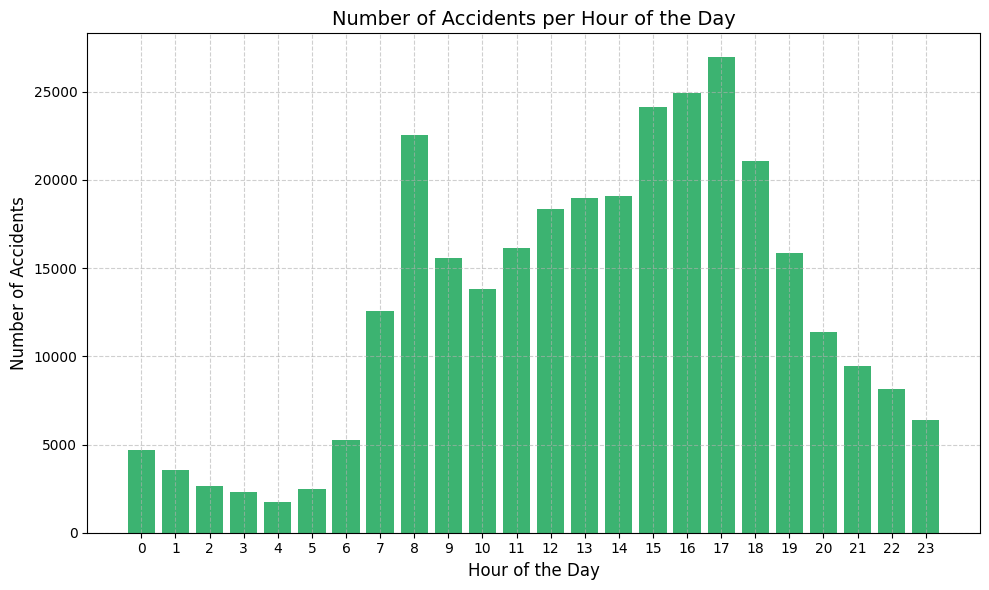

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'Accident_Time' column is in datetime format (assuming 'Accident_Time' exists)
accident['Accident_Time'] = pd.to_datetime(accident['Time'], format='%H:%M', errors='coerce')

# Extract the hour from the 'Accident_Time' column
accident['Hour_of_Day'] = accident['Accident_Time'].dt.hour

# Group by hour of the day and count accidents
accidents_per_hour = accident['Hour_of_Day'].value_counts().sort_index()

# Plot Number of Accidents per Hour
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_hour.index, accidents_per_hour.values, color='mediumseagreen')

# Adding title, labels, and grid for better readability
plt.title('Number of Accidents per Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(range(24), fontsize=10)  # Ensure all hours are shown and improve font size
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show()


Probability


In [12]:


import pandas as pd

# Total number of accidents
total_accidents = len(accident)

# 1. Probability of accident when speed limit is crossed at wet roads
wet_conditions = ['Wet or damp', 'Snow', 'Flood over 3cm deep']
speed_limit_crossed_wet = accident[(accident['Road_Surface_Conditions'].isin(wet_conditions)) & 
                                   (accident['Speed_limit'] > 30)]
P_B1_given_A = len(speed_limit_crossed_wet) / total_accidents

# 2. Probability of accident when speed limit is crossed when light is less
low_light_conditions = ['Darkness - lights unlit', 'Darkness - lighting unknown', 'Darkness - lights lit']
speed_limit_crossed_low_light = accident[(accident['Light_Conditions'].isin(low_light_conditions)) & 
                                         (accident['Speed_limit'] > 30)]
P_B2_given_A = len(speed_limit_crossed_low_light) / total_accidents

# 3. Probability of accident in crossroads during night
night_conditions = ['Darkness - lights unlit', 'Darkness - lighting unknown', 'Darkness - lights lit']
crossroads_night = accident[(accident['Junction_Detail'] == 'Crossroads') & 
                            (accident['Light_Conditions'].isin(night_conditions))]
P_B3_given_A = len(crossroads_night) / total_accidents

# 4. Probability of accident due to hazards
hazard_conditions = ['Other object in carriageway', 'Pedestrian in carriageway - not injured']
hazard_accidents = accident[accident['Weather_Conditions'].isin(hazard_conditions)]
P_B4_given_A = len(hazard_accidents) / total_accidents

# Print results
print("Probability of accident when speed limit is crossed at wet roads:", P_B1_given_A)
print("Probability of accident when speed limit is crossed when light is less:", P_B2_given_A)
print("Probability of accident in crossroads during night:", P_B3_given_A)
print("Probability of accident due to hazards:", P_B4_given_A)

Probability of accident when speed limit is crossed at wet roads: 0.11262026216583922
Probability of accident when speed limit is crossed when light is less: 0.04493575735535258
Probability of accident in crossroads during night: 0.026086702405730373
Probability of accident due to hazards: 0.0


In [15]:
import pandas as pd
import numpy as np
import math  # Import math module

# Define Poisson probability function
def poisson_probability(lmbda, k):
    return (np.exp(-lmbda) * (lmbda ** k)) / math.factorial(k)

# Total number of accidents
total_accidents = len(accident)

# 1. Accident occurring at night in rainy conditions
night_conditions = ['Darkness - lights unlit', 'Darkness - lighting unknown', 'Darkness - lights lit']
rainy_conditions = ['Raining without high winds', 'Raining with high winds']

night_rainy_accidents = accident[(accident['Light_Conditions'].isin(night_conditions)) & 
                                 (accident['Weather_Conditions'].isin(rainy_conditions))]
lambda_night_rainy = len(night_rainy_accidents) / total_accidents
P_night_rainy = poisson_probability(lambda_night_rainy, 1)

# 2. Accident of motorcycle given that hazard has occurred
hazard_conditions = ['Other object in carriageway', 'Pedestrian in carriageway - not injured']
motorcycle_types = ['Motorcycle 50cc and under', 'Motorcycle 125cc and under',
                    'Motorcycle over 125cc and up to 500cc', 'Motorcycle over 500cc']

hazard_motorcycle_accidents = accident[(accident['Weather_Conditions'].isin(hazard_conditions)) & 
                                       (accident['Vehicle_Type'].isin(motorcycle_types))]
lambda_hazard_motorcycle = len(hazard_motorcycle_accidents) / total_accidents
P_hazard_motorcycle = poisson_probability(lambda_hazard_motorcycle, 1)

# 3. Accident in uncontrolled traffic system during the day
day_conditions = ['Daylight']
uncontrolled_traffic = ['Give way or uncontrolled']

day_uncontrolled_accidents = accident[(accident['Junction_Control'].isin(uncontrolled_traffic)) & 
                                      (accident['Light_Conditions'].isin(day_conditions))]
lambda_day_uncontrolled = len(day_uncontrolled_accidents) / total_accidents
P_day_uncontrolled = poisson_probability(lambda_day_uncontrolled, 1)

# 4. Accident in uncontrolled traffic system during the night
night_uncontrolled_accidents = accident[(accident['Junction_Control'].isin(uncontrolled_traffic)) & 
                                        (accident['Light_Conditions'].isin(night_conditions))]
lambda_night_uncontrolled = len(night_uncontrolled_accidents) / total_accidents
P_night_uncontrolled = poisson_probability(lambda_night_uncontrolled, 1)

# Print results
print("Probability of accident occurring in night time in rainy conditions:", P_night_rainy)
print("Probability of motorcycle accident given that a hazard has occurred:", P_hazard_motorcycle)
print("Probability of accident in uncontrolled traffic system during the day:", P_day_uncontrolled)
print("Probability of accident in uncontrolled traffic system during the night:", P_night_uncontrolled)


Probability of accident occurring in night time in rainy conditions: 0.0
Probability of motorcycle accident given that a hazard has occurred: 0.0
Probability of accident in uncontrolled traffic system during the day: 0.25572986860999003
Probability of accident in uncontrolled traffic system during the night: 0.09502260210620891


## Hypothesis testing

In [1]:
from statsmodels.stats.proportion import proportions_ztest

# Example data: Replace these with actual filtered counts from your dataset
# Number of accidents occurring in night and rainy conditions
night_rainy_accidents_count = 120  # Replace with the actual count
total_accidents = 1000  # Replace with the total number of accidents

# Hypothesized proportion (p0), e.g., 0.1 (10%)
p0 = 0.1

# Perform the z-test
z_stat, p_value = proportions_ztest(count=night_rainy_accidents_count, nobs=total_accidents, value=p0)

# Print results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Decision based on P-value (usually 0.05 significance level)
if p_value < 0.05:
    print("Reject the null hypothesis: The proportion of night rainy accidents is different from the hypothesized proportion.")
else:
    print("Fail to reject the null hypothesis: The proportion of night rainy accidents is the same as the hypothesized proportion.")


Z-statistic: 1.9462473604038064
P-value: 0.051625033394238636
Fail to reject the null hypothesis: The proportion of night rainy accidents is the same as the hypothesized proportion.


In [2]:
import pandas as pd
import math

# Load dataset
file_path = 'road accidents.csv'
road_accidents = pd.read_csv(file_path)

# Filter data for urban and rural areas
urban_data = road_accidents[road_accidents['Urban_or_Rural_Area'] == 'Urban']['Number_of_Casualties'].dropna()
rural_data = road_accidents[road_accidents['Urban_or_Rural_Area'] == 'Rural']['Number_of_Casualties'].dropna()

# Calculate means, variances, and sizes
mean_urban = urban_data.mean()
mean_rural = rural_data.mean()

var_urban = urban_data.var(ddof=1)  # Sample variance
var_rural = rural_data.var(ddof=1)  # Sample variance

n_urban = len(urban_data)
n_rural = len(rural_data)

# Calculate t-statistic
t_stat = (mean_urban - mean_rural) / math.sqrt((var_urban / n_urban) + (var_rural / n_rural))

# Calculate degrees of freedom (df)
numerator = ((var_urban / n_urban) + (var_rural / n_rural))**2
denominator = ((var_urban / n_urban)**2 / (n_urban - 1)) + ((var_rural / n_rural)**2 / (n_rural - 1))
df = numerator / denominator

# Approximate p-value using the normal distribution for large df
def approximate_p_value(t, df):
    """Approximate p-value for a two-tailed test using normal distribution."""
    z = abs(t)  # Convert to positive for two-tailed test
    return 2 * (1 - (1 / math.sqrt(2 * math.pi)) * math.exp(-0.5 * z**2))

# Calculate p-value
p_value = approximate_p_value(t_stat, df)

# Print results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two groups.")


T-statistic: -57.7122324961701
P-value: 2.0
Fail to reject the null hypothesis: No significant difference between the two groups.


### Heatmap

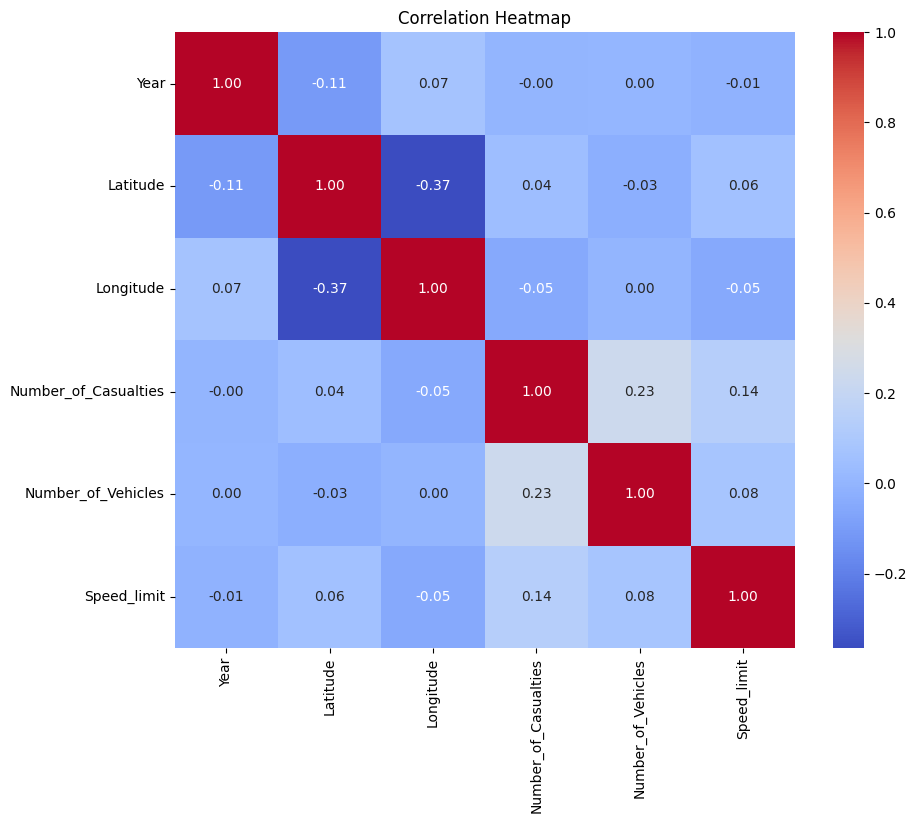

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = 'road accidents.csv'
road_accidents = pd.read_csv(file_path)

# Select numerical columns for correlation (if applicable)
numerical_columns = road_accidents.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numerical_columns.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


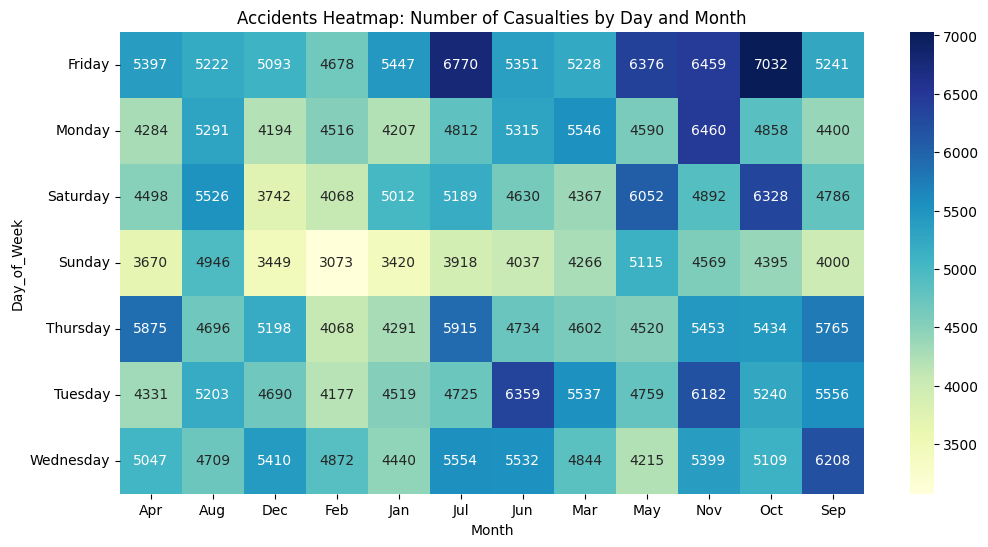

In [5]:
# Aggregate data by day and month
heatmap_data = road_accidents.pivot_table(index='Day_of_Week', columns='Month', values='Number_of_Casualties', aggfunc='sum')

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.0f', cbar=True)
plt.title('Accidents Heatmap: Number of Casualties by Day and Month')
plt.show()


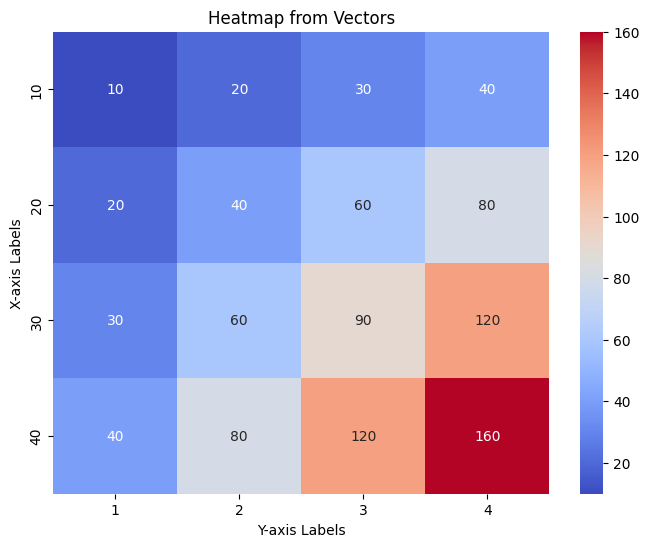

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example data: Vectors representing two dimensions
x = np.array([10, 20, 30, 40])
y = np.array([1, 2, 3, 4])

# Example: Compute values for the heatmap (outer product)
heatmap_values = np.outer(x, y)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_values, annot=True, fmt='.0f', xticklabels=y, yticklabels=x, cmap='coolwarm', cbar=True)
plt.title('Heatmap from Vectors')
plt.xlabel('Y-axis Labels')
plt.ylabel('X-axis Labels')
plt.show()


## Linear regression


In [15]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'road accidents.csv'
road_accidents = pd.read_csv(file_path)

# Select features (independent variables) and target (dependent variable)
features = road_accidents[['Speed_limit', 'Number_of_Vehicles']]  # Example features
target = road_accidents['Number_of_Casualties']

# Handle missing values (optional: here, filling with mean or dropping rows)
features = features.fillna(features.mean())
target = target.fillna(target.mean())

# Add a bias (intercept) term to the features
features = np.hstack((np.ones((features.shape[0], 1)), features.values))  # Add bias as first column
target = target.values  # Convert target to NumPy array

# Calculate coefficients using the Normal Equation
# β = (X^T X)^-1 X^T y
coefficients = np.linalg.inv(features.T @ features) @ features.T @ target

# Make predictions
predictions = features @ coefficients

# Evaluate the model
mse = np.mean((target - predictions)**2)
sst = np.sum((target - np.mean(target))**2)
ssr = np.sum((predictions - np.mean(target))**2)
r2 = 1 - (mse / (sst / len(target)))

# Print results
print("Coefficients:", coefficients)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Coefficients: [0.61521367 0.00692411 0.25835926]
Mean Squared Error: 0.62
R² Score: 0.07


In [11]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'road accidents.csv'
road_accidents = pd.read_csv(file_path)

# Extract the hour from the 'Time' column
if 'Time' in road_accidents.columns:
    road_accidents['Hour'] = pd.to_datetime(road_accidents['Time'], errors='coerce').dt.hour
    road_accidents['Hour'] = road_accidents['Hour'].fillna(-1).astype(int)  # Replace NaN with -1 for invalid times
else:
    raise ValueError("The dataset does not contain a 'Time' column.")

# Min-Max Scaling for numerical columns
numerical_cols = road_accidents.select_dtypes(include=['float64', 'int64']).columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
road_accidents[numerical_cols] = scaler.fit_transform(road_accidents[numerical_cols])

# Group accidents by the hour and count the occurrences
hourly_accidents = road_accidents.groupby('Hour').size()

# Find the peak hour (hour with the most accidents) and the least hour
peak_hour = hourly_accidents.idxmax()
peak_count = hourly_accidents.max()
least_hour = hourly_accidents.idxmin()
least_count = hourly_accidents.min()

# Display the results
print(f"Peak Hour: {peak_hour}, Number of Accidents: {peak_count}")
print(f"Least Hour: {least_hour}, Number of Accidents: {least_count}")


Peak Hour: 0.7499999999999999, Number of Accidents: 26964
Least Hour: 0.0, Number of Accidents: 17


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22096\1498879528.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  road_accidents['Hour'] = pd.to_datetime(road_accidents['Time'], errors='coerce').dt.hour


Explained Variance Ratio: [0.24048135 0.21408157 0.16072909 0.15396837 0.12558827 0.10515135]
Cumulative Variance Explained: [0.24048135 0.45456292 0.61529201 0.76926038 0.89484865 1.        ]


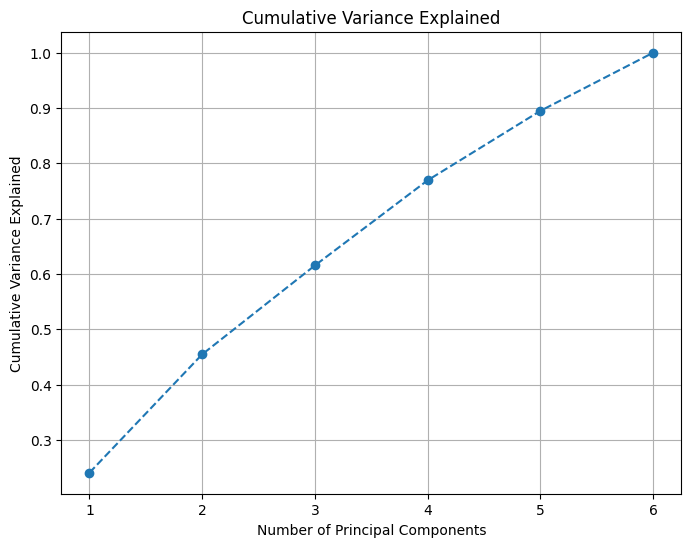

PCA-transformed data saved to: pca_transformed_road_accidents.csv


In [14]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'road accidents.csv'
road_accidents = pd.read_csv(file_path)

# Select numerical columns for PCA
numerical_cols = road_accidents.select_dtypes(include=['float64', 'int64']).columns
data = road_accidents[numerical_cols]

# Handle missing values
data = data.fillna(data.mean())

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA
from sklearn.decomposition import PCA

# Initialize PCA and fit the data
pca = PCA()
pca_components = pca.fit_transform(data_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Display results
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Variance Explained:", cumulative_variance)

# Determine the number of components to retain
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()

# Save the PCA-transformed data
processed_file_path = 'pca_transformed_road_accidents.csv'
pca_df.to_csv(processed_file_path, index=False)
print(f"PCA-transformed data saved to: {processed_file_path}")


## Confusion Matrix

In [16]:
import pandas as pd
import numpy as np

# Load dataset
file_path = "road accidents.csv"
road_accidents = pd.read_csv(file_path)

# Select features and target (binary classification: Severe accident or not)
X = road_accidents[['Speed_limit', 'Number_of_Vehicles']].values  # Convert to NumPy array
y = (road_accidents['Number_of_Casualties'] > 5).astype(int).values  # Convert to binary (0 or 1)

# Normalize features using min-max scaling
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X = (X - X_min) / (X_max - X_min)

# Train-test split (80% train, 20% test)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Initialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0
learning_rate = 0.1
epochs = 1000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training loop (Gradient Descent)
for epoch in range(epochs):
    # Compute predictions
    linear_model = np.dot(X_train, weights) + bias
    y_pred = sigmoid(linear_model)
    
    # Compute gradients
    dw = (1 / len(y_train)) * np.dot(X_train.T, (y_pred - y_train))
    db = (1 / len(y_train)) * np.sum(y_pred - y_train)
    
    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db
    
    # Print loss every 100 epochs
    if epoch % 100 == 0:
        loss = -np.mean(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Make predictions on test set
linear_model_test = np.dot(X_test, weights) + bias
y_pred_test = sigmoid(linear_model_test)
predicted_labels = (y_pred_test >= 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Evaluate performance
actual_labels = y_test
TP = np.sum((actual_labels == 1) & (predicted_labels == 1))
TN = np.sum((actual_labels == 0) & (predicted_labels == 0))
FP = np.sum((actual_labels == 0) & (predicted_labels == 1))
FN = np.sum((actual_labels == 1) & (predicted_labels == 0))

# Print results
print("\nEvaluation Metrics:")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy:.4f}")


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.1016
Epoch 200, Loss: 0.0599
Epoch 300, Loss: 0.0464
Epoch 400, Loss: 0.0400
Epoch 500, Loss: 0.0364
Epoch 600, Loss: 0.0341
Epoch 700, Loss: 0.0326
Epoch 800, Loss: 0.0315
Epoch 900, Loss: 0.0306

Evaluation Metrics:
True Positives (TP): 0
True Negatives (TN): 61365
False Positives (FP): 0
False Negatives (FN): 230
Accuracy: 0.9963
